In [1]:
# prompt: conectar con mi drive y descomprimir BD_Caldiad.rar

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# prompt: descomprime /content/drive/MyDrive/Facultad (Drive)/ Calidad de datos/CDI Compartida/Entrega 3/BD_Caldiad.rar

!unrar x '/content/drive/MyDrive/Facultad (Drive)/ Calidad de datos/CDI Compartida/Entrega 3/BD_Caldiad.rar'


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Facultad (Drive)/ Calidad de datos/CDI Compartida/Entrega 3/BD_Caldiad.rar

Creating    BD Caldiad                                                OK
Extracting  BD Caldiad/Base de datos calidad.sql                           0%  OK 
Extracting  BD Caldiad/check_edades.sql                                    0%  OK 
Extracting  BD Caldiad/check_isbn.sql                                      0%  OK 
Extracting  BD Caldiad/check_price.sql                                     0%  OK 
Extracting  BD Caldiad/check_rn1.sql                                       0%  OK 
Extracting  BD Caldiad/consistencia_fechas.sql                             0%  OK 
Extracting  BD Caldiad/consistencia_ratings.sql                            0%  OK 
Extracting  BD Caldiad/contar_nulls.sql                                    0%  OK 


In [23]:
# prompt: carga en dataframe resultado celda.csv

import pandas as pd

columnas = [
    'IDEjecucion',
    'NombreTabla',
    'Atributo',
    'ni_idea',
    'Valor',
    'Concepto'
]

celda = pd.read_csv(
    '/content/BD Caldiad/Resultado ejecucion celda fila.csv',
    sep=';',
    names=columnas,
    header=None
)
tabla = pd.read_csv('/content/BD Caldiad/Resultado ejecucion tabla.csv', sep=';')
col = pd.read_csv('/content/BD Caldiad/Resultado ejecucion columna.csv', sep=';')

<ipython-input-23-21fc99737c14>:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  celda = pd.read_csv(


In [24]:
ejecucion = pd.read_csv('/content/BD Caldiad/Resultado ejecucion.csv', sep=';')
ejecucion.head()

,ID,IDMetodoAplicado,Fecha
0,6D21FB75-32D0-45E9-A464-950096A161DE,MA_duplicated_authors,2025-06-04 23:52:24.117
1,1F9C962F-0668-4497-9A4F-5C33FC5638BF,MA_date_format,2025-06-04 23:42:33.690
2,1FD54CE6-335A-43C6-AF4C-13558887C2C1,MA_date_format,2025-06-04 23:40:58.037
3,5A14199D-E1A9-4D9D-A539-FE7D26E21AB9,MA_check_price,2025-06-04 23:35:00.780
4,33EEEA0E-7A61-462B-9D6B-B7F23A02BA89,MA_check_edades,2025-06-04 23:32:32.360


In [5]:
print(celda.IDEjecucion.unique())
print(celda.Valor.unique())
print(celda.Atributo.unique())

celda.head()

['85596791-C5A5-49DB-8548-FCF71BC984B6'
 '33EEEA0E-7A61-462B-9D6B-B7F23A02BA89'
 'D9AC4A9F-712D-4EA8-B6DB-35942AAC00A6'
 '23E7A47F-2555-47BA-88FB-9EDB8E8880B4'
 'E9EDE420-87C2-45D5-94CD-D76804CE9C85'
 '1FD54CE6-335A-43C6-AF4C-13558887C2C1'
 '5A14199D-E1A9-4D9D-A539-FE7D26E21AB9'
 '1F9C962F-0668-4497-9A4F-5C33FC5638BF']
[0 1]
['ISBN' 'Age' 'review_time' 'Price' 'PublisherDate']


,IDEjecucion,NombreTabla,Atributo,ni_idea,Valor,Concepto
0,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,B00089IXV6,0,Deficiente
1,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,B000GTD5N4,0,Deficiente
2,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0373195079,0,Deficiente
3,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0374513384,0,Deficiente
4,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0880791942,0,Deficiente


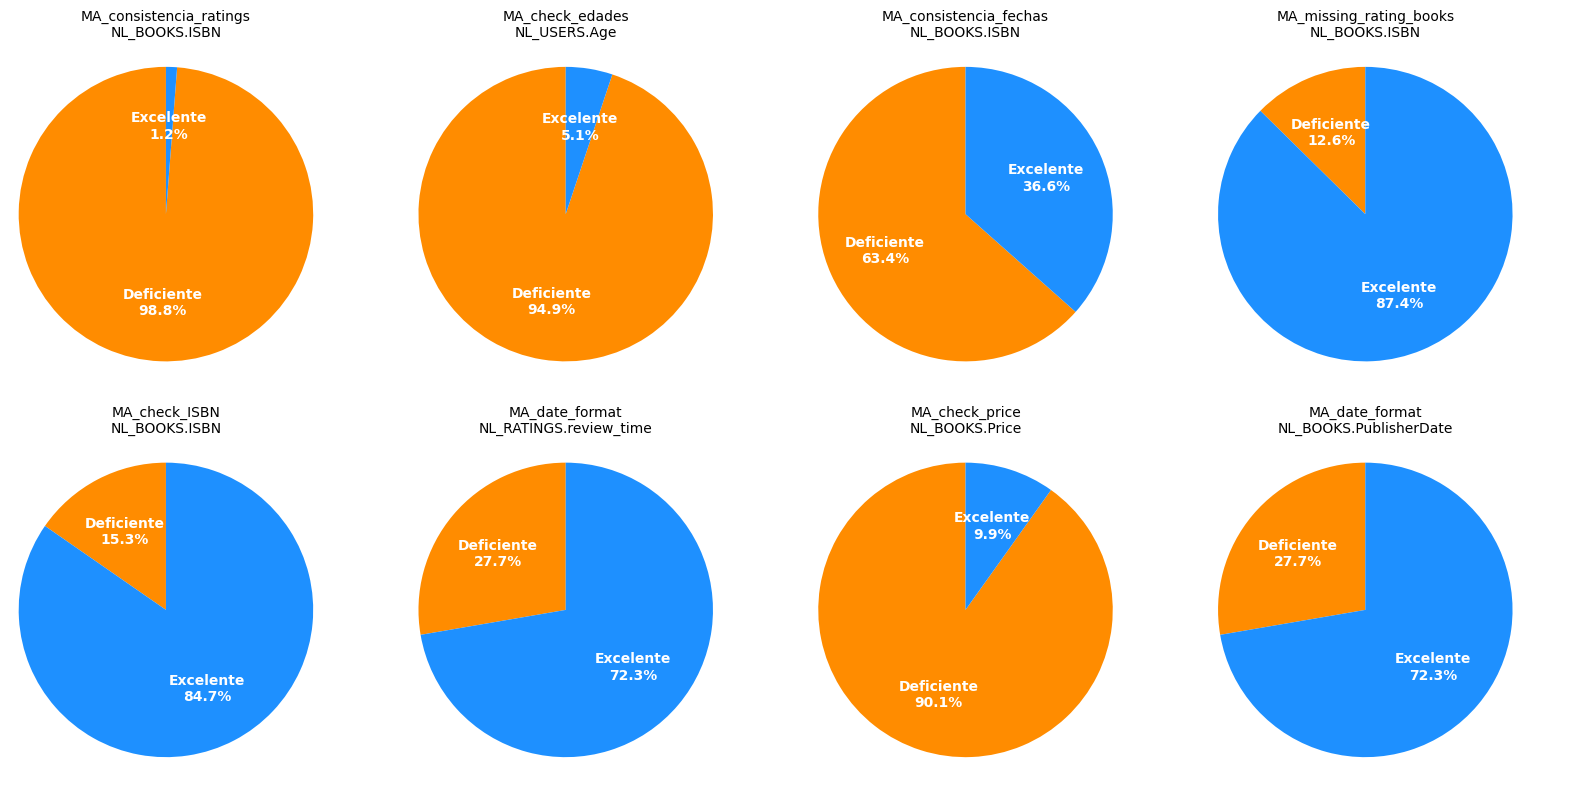

In [6]:
import matplotlib.pyplot as plt

# Asegurar que "Valor" sea tipo entero
celda['Valor'] = celda['Valor'].astype(int)

# Diccionario: ID de ejecución → Título (IDMetodoAplicado)
titulo_por_id = ejecucion.set_index('ID')['IDMetodoAplicado'].to_dict()

# Obtener ejecuciones únicas
ejecuciones = celda['IDEjecucion'].unique()

cols = 4
rows = 2
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
axes = axes.flatten()

labels = ['Deficiente', 'Excelente']
colors = ['darkorange', 'dodgerblue']

for idx, ejec in enumerate(ejecuciones[:rows * cols]):
    ax = axes[idx]
    subset = celda[celda['IDEjecucion'] == ejec]
    counts = subset['Valor'].value_counts().sort_index()
    counts = counts.reindex([0, 1], fill_value=0)

    titulo = titulo_por_id.get(ejec, f"Ejecución {ejec}")

    nombre_tabla_full = subset['NombreTabla'].iloc[0] if not subset.empty else ""
    nombre_tabla_simple = nombre_tabla_full.split('.')[-1] if nombre_tabla_full else ""

    atributo = subset['Atributo'].iloc[0] if not subset.empty else ""

    nombre_atributo = f"{nombre_tabla_simple}.{atributo}" if nombre_tabla_simple and atributo else ""

    wedges, texts, autotexts = ax.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        radius=1,
        textprops={'color': "white", 'weight': 'bold'}
    )

    ax.set_title(f"{titulo}\n{nombre_atributo}", fontsize=10)
    ax.axis('equal')

    for i, t in enumerate(autotexts):
        t.set_text(f"{labels[i]}\n{t.get_text()}")

for j in range(len(ejecuciones), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("todas_las_tortas.png", dpi=300, bbox_inches='tight')
plt.savefig("todas_las_tortas.pdf", bbox_inches='tight')

plt.show()


In [7]:
col.head(100)

,IDEjecucion,NombreTabla,NombreColumna,Valor,Concepto
0,C5E598D9-1F2D-4960-B76E-2DD9680D75A6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0.04,Excelente
1,89E9C5EA-C429-4CDB-94B0-13F18C1E8D07,PruebaLocal2.dbo.NL_BOOKS,AuthorID,0.53,Malo
2,0D46019B-FF74-42FC-A5DE-8CFD1945472A,PruebaLocal2.dbo.NL_BOOKS,PublisherID,0.94,Deficiente
3,5842E556-F4BE-4FBC-8971-6887BD12063D,PruebaLocal2.dbo.NL_USERS,ID,0.61,Malo
4,FC5ED96E-08E8-4B27-A374-28EB161FEF94,PruebaLocal2.dbo.NL_USERS,ID,0.17,Bueno
5,6D21FB75-32D0-45E9-A464-950096A161DE,PruebaLocal2.dbo.NL_BOOKS,AuthorID,0.08,Excelente


In [8]:
col.IDEjecucion.unique()

array(['C5E598D9-1F2D-4960-B76E-2DD9680D75A6',
       '89E9C5EA-C429-4CDB-94B0-13F18C1E8D07',
       '0D46019B-FF74-42FC-A5DE-8CFD1945472A',
       '5842E556-F4BE-4FBC-8971-6887BD12063D',
       'FC5ED96E-08E8-4B27-A374-28EB161FEF94',
       '6D21FB75-32D0-45E9-A464-950096A161DE'], dtype=object)

In [9]:
col[col.IDEjecucion=="C5E598D9-1F2D-4960-B76E-2DD9680D75A6"].head()

,IDEjecucion,NombreTabla,NombreColumna,Valor,Concepto
0,C5E598D9-1F2D-4960-B76E-2DD9680D75A6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0.04,Excelente


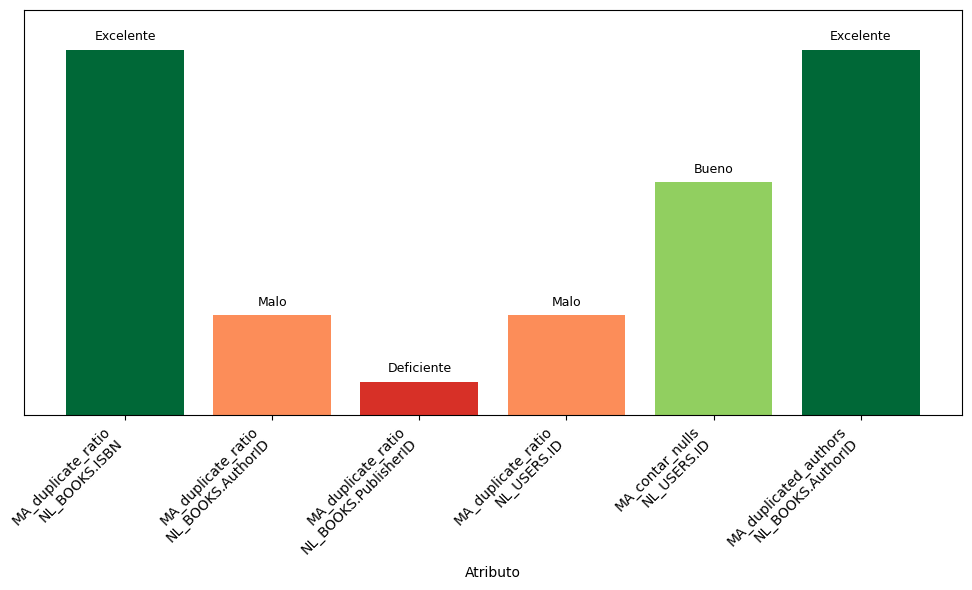

In [10]:
import matplotlib.pyplot as plt

# Mapas para valores y colores
map_valores = {
    'Deficiente': 1,
    'Malo': 2,
    'Aceptable': 3,
    'Bueno': 4,
    'Muy Bueno': 5,
    'Excelente': 6
}

map_colores = {
    'Deficiente': '#d73027',
    'Malo': '#fc8d59',
    'Aceptable': '#fee08b',
    'Bueno': '#91cf60',
    'Muy Bueno': '#1a9850',
    'Excelente': '#006837'
}

# Trabajar sobre una copia
df_barras = col.copy()

# Extraer nombre corto de la tabla
df_barras['Tabla'] = df_barras['NombreTabla'].apply(lambda x: x.split('.')[-1])

# Obtener el método aplicado por cada IDEjecucion usando map
map_metodo = ejecucion.set_index('ID')['IDMetodoAplicado']
df_barras['Metodo'] = df_barras['IDEjecucion'].map(map_metodo)

# Crear etiqueta con el método en la primera línea y luego Tabla.Columna
df_barras['Etiqueta'] = df_barras['Metodo'].astype(str) + '\n' + df_barras['Tabla'] + '.' + df_barras['NombreColumna']

# Mapear a valores numéricos y colores
df_barras['Valor'] = df_barras['Concepto'].map(map_valores)
df_barras['Color'] = df_barras['Concepto'].map(map_colores)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_barras.index, df_barras['Valor'], color=df_barras['Color'])

# Etiquetas del eje X con rotación
plt.xticks(df_barras.index, df_barras['Etiqueta'], rotation=45, ha='right')

# Eliminar números y etiquetas del eje Y
plt.yticks([])  # No muestra números ni etiquetas
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Pero mantiene la grilla

plt.xlabel('Atributo')
# plt.ylabel('Nivel de Concepto')
# plt.title('Nivel de Concepto por Ejecución')
plt.ylim(0.5, 6.6)

# Mostrar texto del concepto sobre cada barra
for bar, concepto in zip(bars, df_barras['Concepto']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             concepto, ha='center', va='bottom', fontsize=9)

plt.tight_layout()

plt.savefig("todas_las_barras.png", dpi=300, bbox_inches='tight')
plt.savefig("todas_las_barras.pdf", bbox_inches='tight')

plt.show()


In [11]:
tabla.head()

,IDEjecucion,NombreTabla,Valor,Concepto
0,6C286FDE-A622-4AD8-934D-C02332507329,PruebaLocal2.dbo.NL_BOOKS,0.16,Bueno


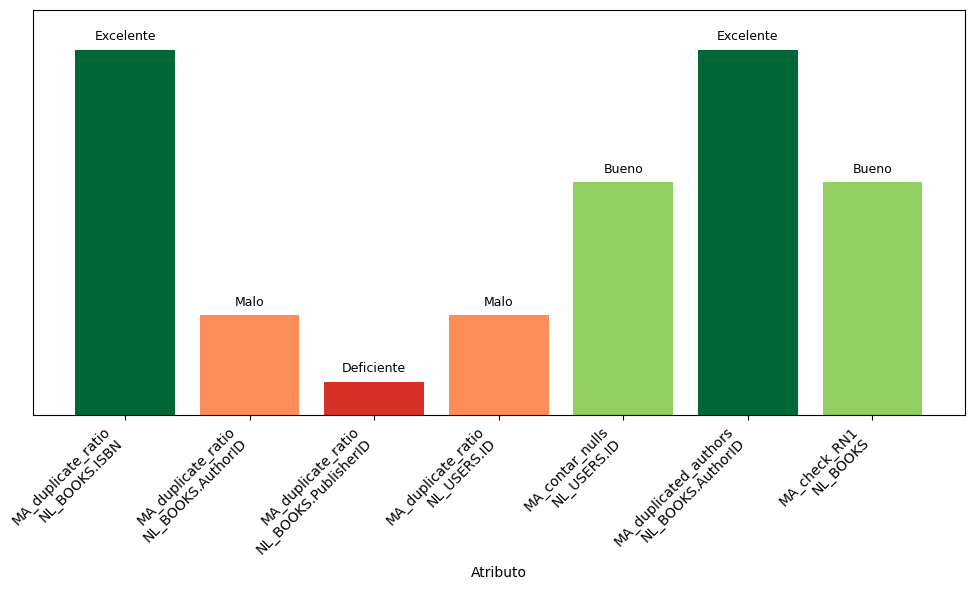

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Mapas para valores y colores
map_valores = {
    'Deficiente': 1,
    'Malo': 2,
    'Aceptable': 3,
    'Bueno': 4,
    'Muy Bueno': 5,
    'Excelente': 6
}

map_colores = {
    'Deficiente': '#d73027',
    'Malo': '#fc8d59',
    'Aceptable': '#fee08b',
    'Bueno': '#91cf60',
    'Muy Bueno': '#1a9850',
    'Excelente': '#006837'
}

# Copia de los datos originales
df_barras = col.copy()

# Extraer nombre corto de la tabla
df_barras['Tabla'] = df_barras['NombreTabla'].apply(lambda x: x.split('.')[-1])

# Obtener método aplicado para cada IDEjecucion
map_metodo = ejecucion.set_index('ID')['IDMetodoAplicado']
df_barras['Metodo'] = df_barras['IDEjecucion'].map(map_metodo)

# Etiqueta con método + tabla.columna
df_barras['Etiqueta'] = df_barras['Metodo'].astype(str) + '\n' + df_barras['Tabla'] + '.' + df_barras['NombreColumna']

# Mapear valores y colores
df_barras['Valor'] = df_barras['Concepto'].map(map_valores)
df_barras['Color'] = df_barras['Concepto'].map(map_colores)

# ======== Procesar la fila de 'tabla' ========
tabla['Tabla'] = tabla['NombreTabla'].apply(lambda x: x.split('.')[-1])
tabla['Metodo'] = tabla['IDEjecucion'].map(map_metodo)
tabla['Etiqueta'] = tabla['Metodo'].astype(str) + '\n' + tabla['Tabla']
tabla['Valor'] = tabla['Concepto'].map(map_valores)  # <--- ESTA LÍNEA ES CLAVE
tabla['Color'] = tabla['Concepto'].map(map_colores)

# Filtrar columnas necesarias
tabla_filtrada = tabla[['IDEjecucion', 'Tabla', 'Metodo', 'Etiqueta', 'Valor', 'Color', 'Concepto']]

# Concatenar
df_barras = pd.concat([df_barras, tabla_filtrada], ignore_index=True)

# ======== Graficar ========
plt.figure(figsize=(10, 6))
bars = plt.bar(df_barras.index, df_barras['Valor'], color=df_barras['Color'])

# Etiquetas eje X
plt.xticks(df_barras.index, df_barras['Etiqueta'], rotation=45, ha='right')

# Ocultar eje Y
plt.yticks([])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.xlabel('Atributo')
plt.ylim(0.5, 6.6)

# Texto sobre cada barra
for bar, concepto in zip(bars, df_barras['Concepto']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             concepto, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("todas_las_barras.png", dpi=300, bbox_inches='tight')
plt.savefig("todas_las_barras.pdf", bbox_inches='tight')
plt.show()


In [18]:
print("tabla: \t",tabla.columns.to_list())
print("col: \t",col.columns.to_list())
print("ejecucion: \t",ejecucion.columns.to_list())
print("celda: \t",celda.columns.to_list())


tabla: 	 ['IDEjecucion', 'NombreTabla', 'Valor', 'Concepto', 'Tabla', 'Metodo', 'Etiqueta', 'Color']
col: 	 ['IDEjecucion', 'NombreTabla', 'NombreColumna', 'Valor', 'Concepto']
ejecucion: 	 ['ID', 'IDMetodoAplicado', 'Fecha']
celda: 	 ['IDEjecucion', 'NombreTabla', 'Atributo', 'ni_idea', 'Valor', 'Concepto']


In [19]:
import pandas as pd

# --- UNIÓN TABLA + COL + EJECUCION ---

# Paso 1: unir 'tabla' con 'ejecucion' para obtener el método aplicado
tabla_join = tabla.merge(ejecucion, left_on='IDEjecucion', right_on='ID')

# Paso 2: unir 'col' con esa tabla por IDEjecucion y NombreTabla
col_join = col.merge(tabla_join[['IDEjecucion', 'NombreTabla', 'Metodo', 'IDMetodoAplicado']],
                     on=['IDEjecucion', 'NombreTabla'], how='left')

# Paso 3: generar resumen con las columnas solicitadas
resumen_tabla_col = col_join[['IDMetodoAplicado', 'Metodo', 'NombreTabla', 'NombreColumna', 'Valor']]

# Opcional: ordenar por IDMetodoAplicado y NombreTabla
resumen_tabla_col = resumen_tabla_col.sort_values(by=['IDMetodoAplicado', 'NombreTabla', 'NombreColumna'])


# --- RESUMEN DE CELDA: PORCENTAJE DE 1 POR ATRIBUTO ---

# Paso 1: unir 'celda' con 'ejecucion' para saber el método aplicado
celda_join = celda.merge(ejecucion, left_on='IDEjecucion', right_on='ID')

# Paso 2: agrupar y calcular porcentaje de valores == 1
resumen_celda = (
    celda_join.groupby(['IDMetodoAplicado', 'NombreTabla', 'Atributo'])['Valor']
    .apply(lambda x: (x == 1).mean() * 100)
    .reset_index(name='Porcentaje_1')
)

# Opcional: redondear el porcentaje
resumen_celda['Porcentaje_1'] = resumen_celda['Porcentaje_1'].round(2)


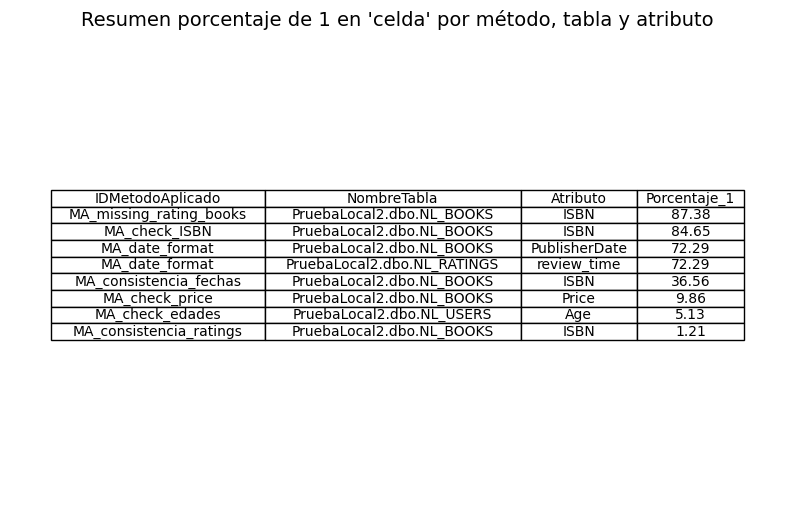

In [20]:
import matplotlib.pyplot as plt

# Primero, ordenamos para mejor visualización (opcional)
resumen_celda_sorted = resumen_celda.sort_values(by='Porcentaje_1', ascending=False).head(20)  # Top 20 para no saturar

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 6))

# Ocultar ejes
ax.axis('off')
ax.axis('tight')

# Construir tabla
tabla = ax.table(
    cellText=resumen_celda_sorted.values,
    colLabels=resumen_celda_sorted.columns,
    cellLoc='center',
    loc='center'
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.auto_set_column_width(col=list(range(len(resumen_celda.columns))))

plt.title("Resumen porcentaje de 1 en 'celda' por método, tabla y atributo", fontsize=14)
plt.show()


In [25]:
# Unir 'tabla' con 'ejecucion' para agregar 'IDMetodoAplicado'
tabla_metodo = tabla.merge(ejecucion[['ID', 'IDMetodoAplicado']], left_on='IDEjecucion', right_on='ID', how='left')
tabla_metodo.drop(columns=['ID'], inplace=True)

# Unir 'col' con 'ejecucion' para agregar 'IDMetodoAplicado'
col_metodo = col.merge(ejecucion[['ID', 'IDMetodoAplicado']], left_on='IDEjecucion', right_on='ID', how='left')
col_metodo.drop(columns=['ID'], inplace=True)

# Unir 'celda' con 'ejecucion' para agregar 'IDMetodoAplicado'
celda_metodo = celda.merge(ejecucion[['ID', 'IDMetodoAplicado']], left_on='IDEjecucion', right_on='ID', how='left')
celda_metodo.drop(columns=['ID'], inplace=True)


In [28]:
tabla_metodo.head()

,IDEjecucion,NombreTabla,Valor,Concepto,IDMetodoAplicado
0,6C286FDE-A622-4AD8-934D-C02332507329,PruebaLocal2.dbo.NL_BOOKS,0.16,Bueno,MA_check_RN1


In [29]:
celda_metodo.head()

,IDEjecucion,NombreTabla,Atributo,ni_idea,Valor,Concepto,IDMetodoAplicado
0,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,B00089IXV6,0,Deficiente,MA_consistencia_ratings
1,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,B000GTD5N4,0,Deficiente,MA_consistencia_ratings
2,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0373195079,0,Deficiente,MA_consistencia_ratings
3,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0374513384,0,Deficiente,MA_consistencia_ratings
4,85596791-C5A5-49DB-8548-FCF71BC984B6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0880791942,0,Deficiente,MA_consistencia_ratings


In [31]:
col_metodo.head(100)

,IDEjecucion,NombreTabla,NombreColumna,Valor,Concepto,IDMetodoAplicado
0,C5E598D9-1F2D-4960-B76E-2DD9680D75A6,PruebaLocal2.dbo.NL_BOOKS,ISBN,0.04,Excelente,MA_duplicate_ratio
1,89E9C5EA-C429-4CDB-94B0-13F18C1E8D07,PruebaLocal2.dbo.NL_BOOKS,AuthorID,0.53,Malo,MA_duplicate_ratio
2,0D46019B-FF74-42FC-A5DE-8CFD1945472A,PruebaLocal2.dbo.NL_BOOKS,PublisherID,0.94,Deficiente,MA_duplicate_ratio
3,5842E556-F4BE-4FBC-8971-6887BD12063D,PruebaLocal2.dbo.NL_USERS,ID,0.61,Malo,MA_duplicate_ratio
4,FC5ED96E-08E8-4B27-A374-28EB161FEF94,PruebaLocal2.dbo.NL_USERS,ID,0.17,Bueno,MA_contar_nulls
5,6D21FB75-32D0-45E9-A464-950096A161DE,PruebaLocal2.dbo.NL_BOOKS,AuthorID,0.08,Excelente,MA_duplicated_authors


In [36]:
resumen_celda_metodo = (
    celda_metodo
    .groupby(['IDEjecucion', 'NombreTabla', 'Atributo', 'IDMetodoAplicado'])['Valor']
    .apply(lambda x: (x == 1).mean() * 100)
    .reset_index(name='% Valor=1')
)

resumen_celda_metodo['% Valor=1'] = resumen_celda_metodo['% Valor=1'].round(2)

resumen_celda_metodo.head()


,IDEjecucion,NombreTabla,Atributo,IDMetodoAplicado,% Valor=1
0,1F9C962F-0668-4497-9A4F-5C33FC5638BF,PruebaLocal2.dbo.NL_BOOKS,PublisherDate,MA_date_format,72.29
1,1FD54CE6-335A-43C6-AF4C-13558887C2C1,PruebaLocal2.dbo.NL_RATINGS,review_time,MA_date_format,72.29
2,23E7A47F-2555-47BA-88FB-9EDB8E8880B4,PruebaLocal2.dbo.NL_BOOKS,ISBN,MA_missing_rating_books,87.38
3,33EEEA0E-7A61-462B-9D6B-B7F23A02BA89,PruebaLocal2.dbo.NL_USERS,Age,MA_check_edades,5.13
4,5A14199D-E1A9-4D9D-A539-FE7D26E21AB9,PruebaLocal2.dbo.NL_BOOKS,Price,MA_check_price,9.86
